# **Connect to Drive**

In [0]:
import tensorflow as tf
from keras import layers, models, losses, activations, optimizers, metrics, regularizers, initializers, callbacks

print(tf.VERSION)
print(tf.keras.__version__)


# from keras import layers, models, losses, activations, optimizers, metrics, regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
# import tensorflow as tf

np.random.seed(123)
tf.set_random_seed(123)

from google.colab import drive
drive.mount('/content/drive')


Using TensorFlow backend.


1.15.0
2.2.4-tf
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!nvidia-smi

Fri Aug 30 18:19:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# **GPU test**

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Imports**

In [0]:
import keras

from skimage import exposure
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np
# import tensorflow as tf
import random as rn
from keras import backend as K

from keras import models
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

from keras.applications import VGG16

from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# from keras.optimizers import SGD

import cv2
import os
import shutil

from keras.utils import plot_model

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose, SeparableConv2D
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.optimizers import Adam, RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import losses
from keras.activations import relu
from keras.layers import advanced_activations


# ***Read full image 224 x 224***

Found 3966 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Generator Sizes:  3966 ,  202
Batch Sizes:  30 ,  30
Number of Classes:  2 ,  2
(30, 224, 224, 3)
=================== 0.79215693 <class 'numpy.float32'> 0.4262305


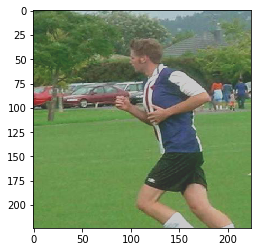

In [0]:


# train_dir = '/content/drive/My Drive/Master/Dataset/INRIA/Train/train/' ## INRIA 
# train_dir = '/content/drive/My Drive/Master/Dataset/Stanford40_SomeClasses/' ## Stanford40 
# train_dir = '/content/drive/My Drive/Master/Dataset/ImageNet/train/' ## ImageNet 
train_dir = '/content/drive/My Drive/Master/Dataset/ImgNt_INR_Stan/' ## ALL datasets ImgNet_INR_Stan
# train_dir = '/content/drive/My Drive/Master/Dataset/ImgNt_INR_Sample/' ## ImgNt & INR Samples
validation_dir = '/content/drive/My Drive/Master/Dataset/INRIA/Train/validation/'

# width_shift_range=0.0,
# height_shift_range=0.0,
# brightness_range=None,
# shear_range=0.0,
# zoom_range=0.0,
# fill_mode='nearest',
# horizontal_flip=False,

transformationNumber = 3

# def contrast_stretching(img):

# #     img_adapteq = exposure.rescale_intensity(img)#, clip_limit=0.03)
#   img_adjust = tf.image.adjust_contrast(img, 0.1)
#   print(type(img_adjust))
  
#   return #img_adapteq


def contrast_stretching(img):
#     print(np.max(img) , type(img[0][0][0]))
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98), out_range=(p2, p98))
#     img_rescale = exposure.equalize_adapthist(img_rescale/255., clip_limit=0.05)
#     img_rescale.astype(int)
    
    return img_rescale

# train_datagen = ImageDataGenerator(rescale=1./255, 
#                                    featurewise_center=True,
#                                    featurewise_std_normalization=True,
# #                                    preprocessing_function=contrast_stretching,
# #                                    zca_whitening=True
# #                                    width_shift_range=0.3, 
# #                                    height_shift_range=0.3,
# #                                    brightness_range=None,
# #                                    shear_range=0.3,
# #                                    zoom_range=0.3,
# #                                    fill_mode='nearest',
# #                                    horizontal_flip=True
#                                   )

# test_datagen = ImageDataGenerator(rescale=1./255,  
#                                    featurewise_center=True, featurewise_std_normalization=True,
# #                                    preprocessing_function=contrast_stretching,
# #                                    zca_whitening=True
#                                  )
datagen = ImageDataGenerator(rescale=1./255, 
#                              featurewise_center=True, 
#                              featurewise_std_normalization=True,
#                              width_shift_range=[-100, 100], 
#                              height_shift_range=[-100, 100],
                             preprocessing_function=contrast_stretching
)

batchTrain = 30
batchValidation = 30

# temp_train_datagen = ImageDataGenerator(rescale=1./255)

# temp_train_generator = temp_train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batchTrain, class_mode='binary', shuffle=True)
# temp_train_generator = temp_train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=temp_train_generator.n, class_mode='binary', shuffle=True)
# # temp_train_generator.batch_size=batchTrain
# dataSize = temp_train_generator.batch_size
# print("==========================", dataSize)

# trainX = temp_train_generator[0][0]
# print ("shape trainX: ", trainX.shape, "Type: ", type(trainX), "mean: ", trainX.mean())
# # train_datagen.mean = trainX.mean()
# # train_datagen.std = trainX.std()

# datagen.fit(trainX)
# test_datagen.mean = train_datagen.mean
# test_datagen.std = train_datagen.std

# print("mean: ", datagen.mean, ", Std: ", datagen.std, ", ZCA: ", datagen.zca_whitening)

train_generator = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batchTrain, class_mode='binary', shuffle=True, seed=1234)#, save_to_dir='G:\PyCharmWorkspace\Keras\\all\SavedFromKerasGenerator')
validation_generator = datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=batchValidation, class_mode='binary', seed=1234)
# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 64), batch_size=740, class_mode='binary')
# train_generator = train_datagen.flow(x=, batch_size=32, save_to_dir='')

print("Generator Sizes: ", train_generator.n, ", ", validation_generator.n)
print("Batch Sizes: ", train_generator.batch_size, ", ", validation_generator.batch_size)
print("Number of Classes: ", train_generator.num_classes, ", ", validation_generator.num_classes)
# print("classes: ", train_generator[0])
# print("classes: ", train_generator.shuffle)

print(train_generator[0][0].shape)
img = train_generator[0][0][10]
print("===================", np.max(img) , type(img[0][0][0]), img.mean())
plt.imshow(img)
plt.show()

# dataTrainX = train_generator[0][0]# * 255).astype(np.uint8)
# dataTrainY = train_generator[0][1]

# print("===================", type(dataTrainX[10]) , type(dataTrainX[10][0][0][0]))
# plt.imshow(dataTrainX[10])
# plt.show()

# np.random.shuffle(train_generator)
# for i in range(len(train_generator.samples)):
#   print (train_generator.samples[i])


# Code to make results ***reproducable***

In [0]:

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(1234)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)


# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Rest of code follows ...

# **Model**

In [0]:

dropout=0.35
mySeed = 1234
initializer = initializers.glorot_uniform(seed=mySeed)#truncated_normal(mean=0.0, stddev=0.5, seed=mySeed)#random_normal(mean=0.0, stddev=0.01, seed=mySeed)
l2Value = 0.001

model = models.Sequential()

# keras.layers.SeparableConv2D(filters,
#                              kernel_size,
#                              strides=(1, 1),
#                              padding='valid',
#                              data_format=None,
#                              dilation_rate=(1, 1),
#                              depth_multiplier=1,
#                              activation=None,
#                              use_bias=True,
#                              depthwise_initializer='glorot_uniform',
#                              pointwise_initializer='glorot_uniform',
#                              bias_initializer='zeros',
#                              depthwise_regularizer=None, 
#                              pointwise_regularizer=None,
#                              bias_regularizer=None, 
#                              activity_regularizer=None, 
#                              depthwise_constraint=None,
#                              pointwise_constraint=None, 
#                              bias_constraint=None)

# conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5

model.add(layers.Conv2D(filters=64, kernel_size=(7, 7), #activation='relu',
                        input_shape=(224, 224, 3),
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
# model.add(layers.activations.relu())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout, seed=mySeed))

#bottleneck
# model.add(layers.Conv2D(filters=20, kernel_size=(1, 1),
#                         kernel_regularizer=regularizers.l2(l2Value),
#                         strides=(1, 1), padding='same',
#                         kernel_initializer=initializer
#                         ))
# model.add(layers.Activation('relu'))

model.add(layers.SeparableConv2D(filters=64, kernel_size=(5, 5),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout, seed=mySeed))

#bottleneck
# model.add(layers.Conv2D(filters=16, kernel_size=(1, 1),
#                         kernel_regularizer=regularizers.l2(l2Value),
#                         strides=(1, 1), padding='same',
#                         kernel_initializer=initializer
#                         ))
# model.add(layers.Activation('relu'))

model.add(layers.SeparableConv2D(filters=128, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout, seed=mySeed))

#bottleneck
# model.add(layers.Conv2D(filters=16, kernel_size=(1, 1),
#                         kernel_regularizer=regularizers.l2(l2Value),
#                         strides=(1, 1), padding='same',
#                         kernel_initializer=initializer
#                         ))
# model.add(layers.Activation('relu'))

model.add(layers.SeparableConv2D(filters=128, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout, seed=mySeed))

#bottleneck
# model.add(layers.Conv2D(filters=32, kernel_size=(1, 1),
#                         kernel_regularizer=regularizers.l2(l2Value),
#                         strides=(1, 1), padding='same',
#                         kernel_initializer=initializer
#                         ))
# model.add(layers.Activation('relu'))

model.add(layers.SeparableConv2D(filters=512, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout, seed=mySeed))

#bottleneck
model.add(layers.Conv2D(filters=128, kernel_size=(1, 1),
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                        ))
model.add(layers.Activation('relu'))

# 7*7 
model.add(layers.SeparableConv2D(filters=512, kernel_size=(7, 7),# activation='relu',
                                 strides=(1, 1),
                                 padding='valid', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(dropout, seed=mySeed))
# 1*1
# model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), #activation='relu',
#                         strides=(1, 1)
#                         ))
# model.add(layers.BatchNormalization(axis=3))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(dropout, seed=mySeed))

#####################################################

# model.add(layers.SeparableConv2D(filters=512, kernel_size=(9, 9), #activation='relu',
#                                  strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# model.add(layers.BatchNormalization(axis=3))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(dropout, seed=mySeed))



# model.add(layers.GlobalAveragePooling2D())

# model.add(layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# # model.add(layers.BatchNormalization(axis=3))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Dropout(dropout, seed=mySeed))

# model.add(layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# # model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(dropout, seed=mySeed))

# model.add(layers.SeparableConv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# # model.add(layers.BatchNormalization(axis=3))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Dropout(dropout, seed=mySeed))

# model.add(layers.SeparableConv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# # model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(dropout, seed=mySeed))


# model.add(layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=(1, 1),
#                                  padding='same', data_format='channels_last', depth_multiplier=1,
#                                  depthwise_regularizer=regularizers.l2(l2Value),
#                                  pointwise_regularizer=regularizers.l2(l2Value),
#                                  depthwise_initializer=initializer, 
#                                  pointwise_initializer=initializer
#                                 ))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(dropout, seed=mySeed))


model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2Value) , kernel_initializer=initializer))
# model.add(layers.Dropout(dropout, seed=mySeed))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))

print( model.summary() )











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      9472      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 112, 112, 64)      5760   

# **Model 2**

In [0]:

dropout=0.35
mySeed = 1234
initializer = initializers.glorot_uniform(seed=mySeed)#truncated_normal(mean=0.0, stddev=0.5, seed=mySeed)#random_normal(mean=0.0, stddev=0.01, seed=mySeed)
l2Value = 0.001

inputLayer = layers.Input(shape=(224, 224, 3))

layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (inputLayer)
layer = Activation('relu') (layer)
layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)
layer = Activation('relu') (layer)
layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)
layer = Activation('relu') (layer)
layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
# layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)






layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)#(inputLayer)
layer = Activation('relu') (layer)
layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)
layer = Activation('relu') (layer)
layer = Conv2D(filters=64, kernel_size=(3, 3), #activation='relu',
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                       ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)

layer = SeparableConv2D(filters=64, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = Activation('relu') (layer)
layer = SeparableConv2D(filters=64, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)

layer = SeparableConv2D(filters=128, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)

layer = SeparableConv2D(filters=128, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)

layer = SeparableConv2D(filters=512, kernel_size=(3, 3),# activation='relu',
                                 strides=(1, 1),
                                 padding='same', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)
layer = MaxPooling2D((2, 2)) (layer)
layer = Dropout(dropout, seed=mySeed) (layer)

#bottleneck
layer = Conv2D(filters=128, kernel_size=(1, 1),
                        kernel_regularizer=regularizers.l2(l2Value),
                        strides=(1, 1), padding='same',
                        kernel_initializer=initializer
                        ) (layer)
layer = Activation('relu') (layer)

# 7*7 
layer = SeparableConv2D(filters=512, kernel_size=(7, 7),# activation='relu',
                                 strides=(1, 1),
                                 padding='valid', data_format='channels_last', depth_multiplier=1,
                                 depthwise_regularizer=regularizers.l2(l2Value),
                                 pointwise_regularizer=regularizers.l2(l2Value),
                                 depthwise_initializer=initializer, 
                                 pointwise_initializer=initializer
                                ) (layer)
layer = BatchNormalization() (layer)
layer = Activation('relu') (layer)

layer = layers.Flatten() (layer)
outputs = Dense(1, activation='sigmoid', kernel_initializer=initializer) (layer)

model = Model(inputs=[inputLayer], outputs=[outputs])

print( model.summary() )










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_

# **Compile Model**

In [0]:
model.compile(optimizer=optimizers.Adam(lr=0.0007),# decay=0.001),
#               optimizer=tf.train.RMSPropOptimizer(learning_rate=0.003),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
             )


print( model.summary() )
# print( model.get_weights() )
# print( model.get_config() )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_____________________________

In [0]:



# model_saved = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/temp.h5', compile=True)

# model.set_weights(model_saved.get_weights())

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n/batchTrain, #((train_generator.n * transformationNumber)/batch),
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=(validation_generator.n/batchValidation))

# history = model.fit(train_x, train_y, batch_size=64, epochs=10)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# train_generator_2 = test_datagen.flow_from_directory(validation_dir, target_size=(128, 64), batch_size=batch, class_mode='binary')

# history = model.fit_generator(train_generator_2,
#                               steps_per_epoch=(train_generator_2.n/batch),
#                               epochs=10)

# acc = history.history['binary_accuracy']
# loss = history.history['loss']

# print("classes: ", train_generator_2.classes)

# model.save('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/temp.h5')



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      9472      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 112, 112, 64)      5760      
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)     

# **VGG layers weights to model**

In [0]:


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.summary()

# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
#   model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)

model.summary()

print('My Model weights: ', type(model.get_weights()), len(model.get_weights()))
print('VGG16 Model weights: ', type(conv_base.get_weights()), len(conv_base.get_weights()))

vggWeights = np.empty(0)

for vggLayer in conv_base.layers:

  if "conv" in vggLayer.name:
  
    vggModelLayerWeightsFlattened = vggLayer.get_weights()[0].flatten()
    print("Flattened VGG Weights Shape: ", vggModelLayerWeightsFlattened.shape, ", ", vggLayer.get_weights()[0].shape)
    vggWeights = np.concatenate((vggWeights, vggModelLayerWeightsFlattened), axis=None)
    
print("VGG weights flattened appended Length: ", vggWeights.shape)

# np.random.shuffle(vggWeights)


i = 0

for lay in model.layers:
  
  print(lay.name)
  lastStop = 0
  
  if "conv" in lay.name:
    
    vggWeightsToModelWeights = []
    numWeightsArraysInLayer = len(lay.get_weights())
    print("numWeightsArraysInLayer: ", numWeightsArraysInLayer)
    
    for j in range(numWeightsArraysInLayer):
      layerSize = lay.get_weights()[j].shape
      print("layerSize: ", layerSize)
      layerShapeMultiplied = 1
      
      for dim in layerSize:
        layerShapeMultiplied *= dim
      
      x = vggWeights[lastStop: (lastStop + layerShapeMultiplied)].reshape(layerSize)
      lastStop = lastStop + layerShapeMultiplied
      vggWeightsToModelWeights.append(x)
      
    print ("Sizes of vggWeightsToModelWeights: ", len(vggWeightsToModelWeights))
    for weights in vggWeightsToModelWeights:
      print(len(weights))
      
    model.layers[i].set_weights(vggWeightsToModelWeights)
    
  i += 1




58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

# **Run Model**

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_3 (Activation)    (None, 224, 224, 64)      0   

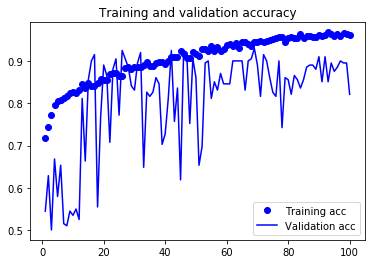

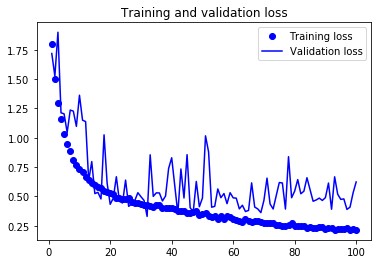

In [9]:
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),#, decay=0.0),
# #               optimizer=tf.train.RMSPropOptimizer(learning_rate=0.003),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy]
#              )
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/sequential_withContrastStandardization_ImageNet_Stanford_DO35_LR0007_L2001.h5')


print( model.summary() )
# print( model.get_weights() )
# print( model.get_config() )

# model_saved = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/temp.h5', compile=True)

# model.set_weights(model_saved.get_weights())
callbacks = [
    # EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.9, patience=10, min_lr=0.0001, verbose=1),
    # ReduceLROnPlateau(factor=0.01, patience=3, min_lr=0.0001, verbose=1),
    # ModelCheckpoint('/content/drive/Shared drives/Medical Images/Lungs/Bounding Box and Ground Truth V2/model-unet_Med_Lar_9Layers_2.h5', verbose=1, save_best_only=True)#, save_weights_only=True)
    ModelCheckpoint("/content/drive/My Drive/Master/INRIA_images_hog/MyIdea/my_keras_model_bottleneck_104.h5",
                    # /content/drive/My Drive/Master/INRIA_images_hog/MyIdea
                                          save_best_only=True)#, save_weights_only=True)
]
# checkpoint_cb = callbacks.ModelCheckpoint("/content/drive/My Drive/Master/INRIA_images_hog/MyIdea/my_keras_model_bottleneck_100.h5",
#                                           save_best_only=True)

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n/batchTrain, #((train_generator.n * transformationNumber)/batch),
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=(validation_generator.n/batchValidation), 
                              callbacks=callbacks)

# history = model.fit(train_x, train_y, batch_size=64, epochs=10)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# train_generator_2 = test_datagen.flow_from_directory(validation_dir, target_size=(128, 64), batch_size=batch, class_mode='binary')

# history = model.fit_generator(train_generator_2,
#                               steps_per_epoch=(train_generator_2.n/batch),
#                               epochs=10)

# acc = history.history['binary_accuracy']
# loss = history.history['loss']

# print("classes: ", train_generator_2.classes)

# model.save('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/temp.h5')



# Test

In [0]:

# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_32_11_s4_MP_DO_sep_2_16_9_s3_DO_16_3_s1_MP_DO_Dense_2_64_DO_16_DO_RMS_001_L2_001_glorot.h5', compile=True)
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/temp93P86N_DO35_LR0007_L201.h5', compile=True)
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/together_withContrast_Stride_1_DO35_LR0007_L2001.h5')
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/MyIdea/my_keras_model_6.h5')
model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/MyIdea/my_keras_model_bottleneck_103.h5')#my_keras_model_bottleneck_9.h5')

plot_model(model, to_file='/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/model.png')

# test_dir = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/'
test_dir_pos = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/' #AllData/test/pos/'
test_dir_neg = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/neg/' #AllData/test/neg/'
# test_dir_pos = '/content/drive/My Drive/Master/Dataset/GeneratedTest/allImages/'#workingPos#allImages/' #AllData/test/pos/'
# test_dir_pos = '/content/drive/My Drive/Master/Dataset/GeneratedTest/Ali_and_Ahmed/'

# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=1, class_mode='binary')
# print("classes: ", test_generator.classes)

# print("train generator classes: ", train_generator.classes,
#       "\n train generator labels: ", train_generator.labels,
#       "\n train generator class indices: ", train_generator.class_indices,
#       "\n train generator length: ", train_generator.n, ", ", len(train_generator),
#       "\n train generator batch size: ", train_generator.batch_size)

test_generator_pos = datagen.flow_from_directory(test_dir_pos, target_size=(224, 224), batch_size=1, class_mode='binary', seed=1234)
print("classes: ", test_generator_pos.classes)
test_generator_neg = datagen.flow_from_directory(test_dir_neg, target_size=(224, 224), batch_size=1, class_mode='binary', seed=1234)
print("classes: ", test_generator_neg.classes)

pos11 = np.round( model.predict_generator(test_generator_pos, steps=test_generator_pos.n) )
pos1 = np.mean( np.round( model.predict_generator(test_generator_pos, steps=test_generator_pos.n) ) )
neg1 = 1 - np.mean( np.round( model.predict_generator(test_generator_neg, steps=test_generator_neg.n) ) )

# correctPredictionsIndixes = np.nonzero(pos11.reshape((1, -1)))[1]
# print("indexes: ", correctPredictionsIndixes, "\ntype: ", type(correctPredictionsIndixes))
# correctImagesNames = np.asarray(test_generator_pos.filenames)[correctPredictionsIndixes]
pos11 = np.reshape(pos11, newshape=(1, -1))
print("__________________________________ SHAPE: ", pos11.shape)
names = np.asarray(test_generator_pos.filenames)
for index in range(pos11.shape[1]):
  if pos11[0, index] == 1.0:
    imageName = names[index]
    print ("index: ", index, "     prediction: ", pos11[0, index], "     imageName: ", imageName)
    # imagePath = test_dir_pos + imageName
    # shutil.copy((imagePath) , ("/content/drive/My Drive/Master/Dataset/GeneratedTest/Ok3/" + imageName))
#     # copy( (imagePath) , ("/content/drive/My Drive/Master/Dataset/GeneratedTest/Ok/" + imageName) )Ali_and_Ahmed2




print( "pos: ", pos11, "\n", np.sum(pos11) ) 
print( "pos: ", pos1 ) 
print( "neg: ", neg1 )

print( "True pos: ", pos1 ) 
print( "True neg: ", neg1 )
print( "False pos:", 1 - neg1 )
print( "False neg:", 1 - pos1 )

# Accuracy = (TP+TN)/(TP+TN+FP+FN)
# •	F-score = 2TP / (2TP + FP + FN)

totalAccuracy = (pos1 + neg1) / (pos1 + neg1 + (1-neg1) + (1-neg1))#(pos * (test_generator_pos.n/(test_generator_pos.n + test_generator_neg.n)) ) + (neg * (test_generator_neg.n/(test_generator_pos.n + test_generator_neg.n)) )
F_Score = (2*pos1) / ( (2*pos1) + (1-neg1) + (1-pos1) )
print("Total Accuracy: ", totalAccuracy, "F-Score", F_Score)


# cpu_model = tpu_model.sync_to_cpu()
# print(model.evaluate_generator(test_generator, steps=740))
# model.evaluate_generator(test_generator, steps=740)

# model.evaluate_generator(test_generator_pos, steps=1)
# model.evaluate_generator(test_generator_neg, steps=1)

################################################


print ("#####-------------------- Test on ImageNet -------------------#####")
test_dir_pos_ImageNet = '/content/drive/My Drive/Master/Dataset/ImageNet/test/pos/' #AllData/test/pos/'
test_dir_neg_ImageNet = '/content/drive/My Drive/Master/Dataset/ImageNet/test/neg/' #AllData/test/neg/'

test_generator_pos = datagen.flow_from_directory(test_dir_pos_ImageNet, target_size=(224, 224), batch_size=1, class_mode='binary')
print("classes: ", test_generator_pos.classes)
test_generator_neg = datagen.flow_from_directory(test_dir_neg_ImageNet, target_size=(224, 224), batch_size=1, class_mode='binary')
print("classes: ", test_generator_neg.classes)


pos2 = np.mean( np.round( model.predict_generator(test_generator_pos, steps=test_generator_pos.n) ) )
neg2 = 1 - np.mean( np.round( model.predict_generator(test_generator_neg, steps=test_generator_neg.n) ) )


print( "pos: ", pos2 ) 
print( "neg: ", neg2 )

print( "True pos: ", pos2 ) 
print( "True neg: ", neg2 )
print( "False pos:", 1 - neg2 )
print( "False neg:", 1 - pos2 )


totalAccuracy = (pos2 + neg2) / (pos2 + neg2 + (1-neg2) + (1-neg2))#(pos * (test_generator_pos.n/(test_generator_pos.n + test_generator_neg.n)) ) + (neg * (test_generator_neg.n/(test_generator_pos.n + test_generator_neg.n)) )
F_Score = (2*pos2) / ( (2*pos2) + (1-neg2) + (1-pos2) )
print("Total Accuracy: ", totalAccuracy, "F-Score", F_Score)

# ##################################

print ("#####-------------------- Test on Pascal Voc 2007 -------------------#####")
test_dir_pos_ImageNet = '/content/drive/My Drive/Master/Dataset/PascalVoc2007/test/pos/' #AllData/test/pos/'
# test_dir_neg_ImageNet = '/content/drive/My Drive/Master/Dataset/ImageNet/test/neg/' #AllData/test/neg/'

test_generator_pos = datagen.flow_from_directory(test_dir_pos_ImageNet, target_size=(224, 224), batch_size=1, class_mode='binary')
print("classes: ", test_generator_pos.classes)
# test_generator_neg = datagen.flow_from_directory(test_dir_neg_ImageNet, target_size=(224, 224), batch_size=1, class_mode='binary')
# print("classes: ", test_generator_neg.classes)


pos3 = np.mean( np.round( model.predict_generator(test_generator_pos, steps=test_generator_pos.n) ) )
# neg = 1 - np.mean( np.round( model.predict_generator(test_generator_neg, steps=test_generator_neg.n) ) )


print( "pos: ", pos3 ) 
# print( "neg: ", neg )

print( "True pos: ", pos3 ) 
# print( "True neg: ", neg )
# print( "False pos:", 1 - neg )
print( "False neg:", 1 - pos3 )

# totalAccuracy = pos / test_generator_pos.n #(pos * (test_generator_pos.n/(test_generator_pos.n + test_generator_neg.n)) ) + (neg * (test_generator_neg.n/(test_generator_pos.n + test_generator_neg.n)) )

# F-Score = (2*pos) / ( (2*pos) + (1-neg) + (1-pos))
# print("Total Accuracy: ", totalAccuracy, "F-Score", F-Score)

print ("#####-------------------- Test on All Datasets -------------------#####")

totalPos = (pos1 + pos2 + pos3) / 3
totalNeg = (neg1 + neg2) / 2


print( "total pos: ", totalPos ) 
print( "total neg: ", totalNeg )

print( "True pos: ", totalPos ) 
print( "True neg: ", totalNeg )
print( "False pos:", 1 - totalNeg )
print( "False neg:", 1 - totalPos )


totalAccuracy = (totalPos + totalNeg) / (totalPos + totalNeg + (1-totalNeg) + (1-totalNeg))#(pos * (test_generator_pos.n/(test_generator_pos.n + test_generator_neg.n)) ) + (neg * (test_generator_neg.n/(test_generator_pos.n + test_generator_neg.n)) )
F_Score = (2*totalPos) / ( (2*totalPos) + (1-totalNeg) + (1-totalPos) )
print("Total Accuracy: ", totalAccuracy, "F-Score", F_Score)

Found 288 images belonging to 1 classes.
classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Found 452 images belonging to 1 classes.
classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

# **------------------------------------**

# **Setting the global float to float16 instead of float32: for GridSearchCV on Together data bold text**

In [0]:

K.set_floatx('float16')
K.set_epsilon(1e-4)

keras.backend.floatx()


'float16'

# HyperParameters Tuning Library

In [0]:
# !pip install hyperas
# !pip install git+https://github.com/hyperopt/hyperopt.git
!pip install hyperas
!pip install hyperopt

In [0]:

from hyperopt import Trials, STATUS_OK, tpe
# from keras.datasets import mnist
# from keras.layers.core import Dense, Dropout, Activation
# from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform



def getVGGWeights(model):
  
  from PIL import ImageFile
  ImageFile.LOAD_TRUNCATED_IMAGES = True
  # from keras import backend as K
  from keras import models
  from keras.utils import CustomObjectScope
  from keras.initializers import glorot_uniform

  from keras.applications import VGG16


  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(200, 200, 3))

  conv_base.summary()

  # with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
  #   model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)

  model.summary()

  print('My Model weights: ', type(model.get_weights()), len(model.get_weights()))
  print('VGG16 Model weights: ', type(conv_base.get_weights()), len(conv_base.get_weights()))

  vggWeights = np.empty(0)

  for vggLayer in conv_base.layers:

    if "conv" in vggLayer.name:

      vggModelLayerWeightsFlattened = vggLayer.get_weights()[0].flatten()
      print("Flattened VGG Weights Shape: ", vggModelLayerWeightsFlattened.shape, ", ", vggLayer.get_weights()[0].shape)
      vggWeights = np.concatenate((vggWeights, vggModelLayerWeightsFlattened), axis=None)

  print("VGG weights flattened appended Length: ", vggWeights.shape)

  # np.random.shuffle(vggWeights)


  i = 0

  for lay in model.layers:

    print(lay.name)
    lastStop = 0

    if "conv" in lay.name:

      vggWeightsToModelWeights = []
      numWeightsArraysInLayer = len(lay.get_weights())
      print("numWeightsArraysInLayer: ", numWeightsArraysInLayer)

      for j in range(numWeightsArraysInLayer):
        layerSize = lay.get_weights()[j].shape
        print("layerSize: ", layerSize)
        layerShapeMultiplied = 1

        for dim in layerSize:
          layerShapeMultiplied *= dim

        x = vggWeights[lastStop: (lastStop + layerShapeMultiplied)].reshape(layerSize)
        lastStop = lastStop + layerShapeMultiplied
        vggWeightsToModelWeights.append(x)

      print ("Sizes of vggWeightsToModelWeights: ", len(vggWeightsToModelWeights))
      for weights in vggWeightsToModelWeights:
        print(len(weights))

      model.layers[i].set_weights(vggWeightsToModelWeights)

    i += 1
    
  return model




def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    dataTrainX
    dataTrainY

    print(type(dataTrainX), dataTrainX.shape)

    return dataTrainX, dataTrainY#, x_test, y_test



def create_model(x_train, y_train, l2Value=0.001):#, x_test, y_test):
    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    """
#     model = Sequential()
#     model.add(Dense(512, input_shape=(784,)))
#     model.add(Activation('relu'))
#     model.add(Dropout({{uniform(0, 1)}}))
#     model.add(Dense({{choice([256, 512, 1024])}}))
#     model.add(Activation({{choice(['relu', 'sigmoid'])}}))
#     model.add(Dropout({{uniform(0, 1)}}))

#     # If we choose 'four', add an additional fourth layer
#     if {{choice(['three', 'four'])}} == 'four':
#         model.add(Dense(100))

#         # We can also choose between complete sets of layers

#         model.add({{choice([Dropout(0.5), Activation('linear')])}})
#         model.add(Activation('relu'))

#     model.add(Dense(10))
#     model.add(Activation('softmax'))

  
    model = models.Sequential()

    model.add(layers.Conv2D(filters=64, kernel_size=(11, 11), activation='relu', input_shape=(200, 200, 3),
                          kernel_regularizer=regularizers.l2(l2Value),
                          strides=(1, 1), padding='same',
                          kernel_initializer=initializer
                         ))
    # model.add(layers.BatchNormalization(axis=3))
    # model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout, seed=mySeed))

    model.add(layers.SeparableConv2D(filters=64, kernel_size=(9, 9), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
    # model.add(layers.BatchNormalization(axis=3))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout, seed=mySeed))

    model.add(layers.SeparableConv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
    # model.add(layers.BatchNormalization(axis=3))
    # model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout, seed=mySeed))

    model.add(layers.SeparableConv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout, seed=mySeed))


    model.add(layers.SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout, seed=mySeed))


    model.add(layers.Flatten())

    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))
    
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
#                   optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    model.compile(optimizer=optimizers.Adam(lr={{choice([.001, 0.005, 0.0007])}}),# decay=0.001),
    #               optimizer=tf.train.RMSPropOptimizer(learning_rate=0.003),
              loss=losses.binary_crossentropy,
              metrics=["accuracy"]#[metrics.binary_accuracy]
             )

    print( model.summary() )

    model = getVGGWeights(model)



    result = model.fit(x_train, y_train,
              batch_size={{choice([40, 50, 60])}},
              epochs=100,
              verbose=2,
              validation_split=0.1)
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                     notebook_name='drive/My Drive/Master/Colab Notebooks/LCNN INRIA')

X_train, Y_train = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

# Sampling Dataset

# Grid Search Model

In [0]:


# def readData(batch_size = 128):
  
#   datagen = ImageDataGenerator(rescale=1./255, 
#   #                              featurewise_center=True, 
#   #                              featurewise_std_normalization=True,
#                              preprocessing_function=contrast_stretching
#   )

#   temp_train_datagen = ImageDataGenerator(rescale=1./255)

#   temp_train_generator = temp_train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary', shuffle=True)
#   temp_train_generator = temp_train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=temp_train_generator.n, class_mode='binary', shuffle=True)
#   # temp_train_generator.batch_size=batchTrain
#   dataSize = temp_train_generator.batch_size
#   print("==========================", dataSize)

#   trainX = temp_train_generator[0][0]
#   print ("shape trainX: ", trainX.shape, "Type: ", type(trainX), "mean: ", trainX.mean())
#   # train_datagen.mean = trainX.mean()
#   # train_datagen.std = trainX.std()

#   datagen.fit(trainX)
# #   test_datagen.mean = train_datagen.mean
# #   test_datagen.std = train_datagen.std

# #   print("mean: ", datagen.mean, ", Std: ", datagen.std, ", ZCA: ", datagen.zca_whitening)

#   train_generator = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary', shuffle=True)#, save_to_dir='G:\PyCharmWorkspace\Keras\\all\SavedFromKerasGenerator')
#   validation_generator = datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
#   # test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 64), batch_size=740, class_mode='binary')
#   # train_generator = train_datagen.flow(x=, batch_size=32, save_to_dir='')

#   print("Generator Sizes: ", train_generator.n, ", ", validation_generator.n)
#   print("Batch Sizes: ", train_generator.batch_size, ", ", validation_generator.batch_size)
#   print("Number of Classes: ", train_generator.num_classes, ", ", validation_generator.num_classes)


def getVGGWeights(model):

  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(200, 200, 3))

  conv_base.summary()

  # with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
  #   model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)

  model.summary()

  print('My Model weights: ', type(model.get_weights()), len(model.get_weights()))
  print('VGG16 Model weights: ', type(conv_base.get_weights()), len(conv_base.get_weights()))

  vggWeights = np.empty(0)

  for vggLayer in conv_base.layers:

    if "conv" in vggLayer.name:

      vggModelLayerWeightsFlattened = vggLayer.get_weights()[0].flatten()
      print("Flattened VGG Weights Shape: ", vggModelLayerWeightsFlattened.shape, ", ", vggLayer.get_weights()[0].shape)
      vggWeights = np.concatenate((vggWeights, vggModelLayerWeightsFlattened), axis=None)

  print("VGG weights flattened appended Length: ", vggWeights.shape)

  # np.random.shuffle(vggWeights)


  i = 0

  for lay in model.layers:

    print(lay.name)
    lastStop = 0

    if "conv" in lay.name:

      vggWeightsToModelWeights = []
      numWeightsArraysInLayer = len(lay.get_weights())
      print("numWeightsArraysInLayer: ", numWeightsArraysInLayer)

      for j in range(numWeightsArraysInLayer):
        layerSize = lay.get_weights()[j].shape
        print("layerSize: ", layerSize)
        layerShapeMultiplied = 1

        for dim in layerSize:
          layerShapeMultiplied *= dim

        x = vggWeights[lastStop: (lastStop + layerShapeMultiplied)].reshape(layerSize)
        lastStop = lastStop + layerShapeMultiplied
        vggWeightsToModelWeights.append(x)

      print ("Sizes of vggWeightsToModelWeights: ", len(vggWeightsToModelWeights))
      for weights in vggWeightsToModelWeights:
        print(len(weights))

      model.layers[i].set_weights(vggWeightsToModelWeights)

    i += 1
    
  return model


dropout=0.35
mySeed = 1234
initializer = initializers.glorot_uniform(seed=mySeed)#truncated_normal(mean=0.0, stddev=0.5, seed=mySeed)#random_normal(mean=0.0, stddev=0.01, seed=mySeed)
#l2Value = 0.01


# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.0007, l2Value=0.001):#, momentum=0):

  
  
  # create model

  model = models.Sequential()

  model.add(layers.Conv2D(filters=64, kernel_size=(11, 11), activation='relu', input_shape=(200, 200, 3),
                          kernel_regularizer=regularizers.l2(l2Value),
                          strides=(1, 1), padding='same',
                          kernel_initializer=initializer
                         ))
  # model.add(layers.BatchNormalization(axis=3))
  # model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout, seed=mySeed))

  model.add(layers.SeparableConv2D(filters=64, kernel_size=(9, 9), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
  # model.add(layers.BatchNormalization(axis=3))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout, seed=mySeed))

  model.add(layers.SeparableConv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
  # model.add(layers.BatchNormalization(axis=3))
  # model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout, seed=mySeed))

  model.add(layers.SeparableConv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout, seed=mySeed))


  model.add(layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=(1, 1),
                                   padding='same', data_format='channels_last', depth_multiplier=1,
                                   depthwise_regularizer=regularizers.l2(l2Value),
                                   pointwise_regularizer=regularizers.l2(l2Value),
                                   depthwise_initializer=initializer, 
                                   pointwise_initializer=initializer
                                  ))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout, seed=mySeed))


  model.add(layers.Flatten())
  
  model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))

	# Compile model

#   optimizer = SGD(lr=learn_rate, momentum=momentum)
# 	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  model.compile(optimizer=optimizers.Adam(lr=learn_rate),# decay=0.001),
  #               optimizer=tf.train.RMSPropOptimizer(learning_rate=0.003),
                loss=losses.binary_crossentropy,
                metrics=["accuracy"]#[metrics.binary_accuracy]
               )

  print( model.summary() )
  
  model = getVGGWeights(model)

  return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset

# create model
model = KerasClassifier(build_fn=create_model, verbose=0, epochs=100)#, batch_size=40)
# define the grid search parameters
# learn_rate = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.005, 0.009, 0.01, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3]
# l2Value = [0.09, 0.05, 0.01, 0.007, 0.005, 0.001]
learn_rate = [0.0007, 0.001, 0.005]
# l2Value = [0.01, 0.007, 0.001]
# momentum = [0.0, 0.2, 0.5, 0.9, 0.99]
batch_sizes = [40, 50, 60]

param_grid = dict(batch_size=batch_sizes, learn_rate=learn_rate)#, l2Value=l2Value)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#train_generator.n
# train_generator = datagen.flow_from_directory(train_dir, target_size=(200, 200), batch_size=3966, class_mode='binary', shuffle=True)#, save_to_dir='G:\PyCharmWorkspace\Keras\\all\SavedFromKerasGenerator')

# dataTrainX = train_generator[0][0]
# dataTrainY = train_generator[0][1]

print(type(dataTrainX), dataTrainX.shape)

# dataValidationX, dataValidationY = test_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=batchValidation, class_mode='binary')

grid_result = grid.fit(dataTrainX, dataTrainY)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    



# Test best model from GridSearchCV

In [0]:
test_dir_pos = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/' #AllData/test/pos/'
# test_dir_pos = '/content/drive/My Drive/Master/Dataset/PennFudan/' #AllData/test/pos/'
test_dir_neg = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/neg/' #AllData/test/neg/'

# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=1, class_mode='binary')
# print("classes: ", test_generator.classes)

# myModel = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/temp89P89N_DO35_LR0007_L2001.h5')


print(train_generator.classes, train_generator.labels, train_generator.class_indices)
test_generator_pos = datagen.flow_from_directory(test_dir_pos, target_size=(224, 224), batch_size=170, class_mode='binary')
print("classes: ", test_generator_pos.classes)
test_generator_neg = datagen.flow_from_directory(test_dir_neg, target_size=(224, 224), batch_size=452, class_mode='binary')
print("classes: ", test_generator_neg.classes)

myModel = grid_result.best_estimator_.model

pos = myModel.predict(test_generator_pos[0][0])#grid.predict
neg = myModel.predict(test_generator_neg[0][0])



print( "pos: ", pos ) 
print( "neg: ", neg )

print( "True pos: ", np.mean( np.round( pos ) ) ) 
print( "True neg: ", 1 - np.mean( np.round( neg ) ) )
print( "False pos:", np.mean( np.round( neg ) ) )
print( "False neg:", 1 - np.mean( np.round( pos ) ) )

# myModel = grid.best_estimator_.model
print( myModel.summary() )

# myModel.save('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/temp89P89N_DO35_LR0007_L2001.h5')



# Train on TPU

In [0]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model.compile(
    optimizer=tf.train.RMSPropOptimizer(learning_rate=0.001),
#     optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)
#     optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
#     loss=tf.keras.losses.sparse_categorical_crossentropy,
#     metrics=['sparse_categorical_accuracy']
# )

# def train_gen(batch_size):
#   while True:
#     offset = np.random.randint(0, x_train.shape[0] - batch_size)
#     yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]
    

# tpu_model.fit_generator(
#     train_gen(1024),
#     epochs=1,
#     steps_per_epoch=1000,
#     validation_data=(x_test, y_test),
# )


history = tpu_model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n/batch, #((train_generator.n * transformationNumber)/batch),
                              epochs=80,
                              validation_data=validation_generator,
                              validation_steps=(validation_generator.n/batch))

# history = model.fit(train_x, train_y, batch_size=64, epochs=10)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


model.save('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/temp.h5')



In [0]:
# sudo python setup.py install

# sudo pip install keras-vis
# !pip install -q keras-vis
# !pip install -q keras
# pip install hyperas


In [0]:
# model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)
print(model.summary())
model.save('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/together_withContrast_Stride_1_DO35_LR0007_L2001_temp.h5')


# 91 p 83 n last layer 12 filters 100 epochs

# 91 p 85 n last layer 16 filters 100 epochs

# 86 p 88 n 2nd layer 20 last layer 16 filters 100 epochs

# 89.9 p 86 n DO .35 LR .007 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 64)      23296     
_________________________________________________________________
dropout_59 (Dropout)         (None, 224, 224, 64)      0         
_________________________________________________________________
separable_conv2d_49 (Separab (None, 224, 224, 64)      9344      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
separable_conv2d_50 (Separab (None, 112, 112, 128)     9920      
_________________________________________________________________
dropout_61 (Dropout)         (None, 112, 112, 128)     0         
__________

# CAM Visualization 

In [0]:
import cv2
import os
from keras import backend as K
from keras import models


from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
#   model = models.load_model('/content/drive/My Drive/Master/INRIA_images_hog/LCNN_Models/conv_1_512_11_s3_MP_DO_sep_2_128_9_s3_MP_DO_64_3_s1_MP_DO_RMS_003_L2_001_glorot.h5', compile=True)


from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import keras
from PIL import Image


images = os.listdir('/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/pos')


testDirectoryPath = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/pos/'
model.summary()

model.layers[-4].activation = activations.linear
model = utils.apply_modifications(model)

# while True:
#   mydir = next_dir_name()
#   try:
#       os.makedirs(mydir)
#       break
#   except OSError, e:
#       if e.errno != os.errno.EEXIST:
#           raise   
#       # time.sleep might help here
#       pass

path = '/content/drive/My Drive/Master/Dataset/INRIA/Test/CAM2/'

# os.mkdir( path );



for i in range( len(images) ):
  imagePath = testDirectoryPath + images[i]
  img = image.load_img(imagePath, target_size=(224, 224))
  
  xI2A = image.img_to_array(img)
  x = np.expand_dims(xI2A, axis=0)
#   layerIndex = utils.find_layer_idx(model, 'layer name')

  grads = visualize_cam(model, layer_idx=-4, filter_indices=1, seed_input=x, backprop_modifier=None)

  print(type(grads), type(img))

  original = img#Image.open(imagePath)
  overlay = image.array_to_img(grads)

  original = original.convert("RGBA")
  overlay = overlay.convert("RGBA")

  new_img = Image.blend(original, overlay, 0.4)
  
  figure= plt.figure()
  figure.suptitle('Image #' + str(i))
  plt.grid(b=False)
  plt.imshow(new_img, cmap='jet')
  plt.show()
  
  
  
  

  image.save_img(path + str(i) + '.png', image.img_to_array(new_img))

# 	CAM_for_image(imagePath)
  

# images = os.listdir('/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/pos')


# testDirectoryPath = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/pos/'

# def CAM_for_image(img_path):
  
#   img = image.load_img(img_path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
  
#   preds = model.predict(x)

#   humanClass = model.output[:, np.argmax(preds[0])]
#   last_conv_layer = model.get_layer('dense_2')

#   grads = K.gradients(humanClass, last_conv_layer.output)[0]
#   # human_class_output = model.output[:, 1]
  
#   pooled_grads = K.mean(grads, axis=(0))#, 1, 2))
#   iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
#   pooled_grads_value, conv_layer_output_value = iterate([x])
  
#   for i in range(2):
#     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
#   heatmap = np.mean(conv_layer_output_value, axis=-1)
#   heatmap = np.maximum(heatmap, 0)
#   heatmap /= np.max(heatmap)
  
#   plt.matshow(heatmap)
  
#   img = cv2.imread(img_path)
  
#   heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
#   heatmap = np.uint8(255 * heatmap)
#   heatmap = cv2.applyColorMap(heatmap, cv2.COLOMAP_JET)
  
#   superimposed_img = heatmap * 0.4 + img
  
#   plt.imshow(superimposed_img)
  

# for i in range( len(images) ):
# 	imagePath = testDirectoryPath + images[i]
# 	CAM_for_image(imagePath)







# Check image values are integers or float

In [0]:
from keras.preprocessing import image
train_dir = '/content/drive/My Drive/Master/Dataset/All/train/'
validation_dir = '/content/drive/My Drive/Master/Dataset/INRIA/Train/validation/'

# train_neg# _1007_566826.png
# validation_neg# 00000369a.png
# test_neg# no_person__no_bike_263.png // pos  person_and_bike_181.png

img_path_train = '/content/drive/My Drive/Master/Dataset/All/train/neg/_1007_566826.png'#_9519_2021160.png'
img_path_validation = '/content/drive/My Drive/Master/Dataset/INRIA/Train/validation/neg/00000369a.png'#crop001527.png'
img_path_test = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/neg/no_person__no_bike_263.png'#crop001522.png'

imgTrain = image.load_img(img_path_train, target_size=(224, 224))
print('image train type: ', type(imgTrain))
print('image train values: ', (imgTrain.getdata()[0]), ', ', type(imgTrain.getdata()[0][0]))

xTrain = image.img_to_array(imgTrain)
print('array train type: ', type(xTrain))
print('array train values: ', (xTrain[0][0]), ', ', type(xTrain[0][0][0]))
print('array train values type: ', type(xTrain[0][0]))
print('array train shape: ', xTrain.shape)

imgValidation = image.load_img(img_path_validation, target_size=(224, 224))
print('\nimage validation type: ', type(imgValidation))
print('image validation values: ', (imgValidation.getdata()[0]), ', ', type(imgValidation.getdata()[0][0]))

xValidation = image.img_to_array(imgValidation)
print('array validation type: ', type(xValidation))
print('array validation values: ', (xValidation[0][0]), ', ', type(xValidation[0][0][0]))
print('array validation values type: ', type(xValidation[0][0]))
print('array validation shape: ', xValidation.shape)

imgTest = image.load_img(img_path_test, target_size=(224, 224))
print('\nimage test type: ', type(imgTest))
print('image test values: ', (imgTest.getdata()[0]), ', ', type(imgTest.getdata()[0][0]))

xTest = image.img_to_array(imgTest)
print('array test type: ', type(xTest))
print('array test values: ', (xTest[0][0]), ', ', type(xTest[0][0][0]))
print('array test values type: ', type(xTest[0][0]))
print('array test shape: ', xTest.shape)


# plt.imshow(x)

image train type:  <class 'PIL.Image.Image'>
image train values:  (127, 119, 120) ,  <class 'int'>
array train type:  <class 'numpy.ndarray'>
array train values:  [127. 119. 120.] ,  <class 'numpy.float32'>
array train values type:  <class 'numpy.ndarray'>
array train shape:  (224, 224, 3)

image validation type:  <class 'PIL.Image.Image'>
image validation values:  (91, 111, 76) ,  <class 'int'>
array validation type:  <class 'numpy.ndarray'>
array validation values:  [ 91. 111.  76.] ,  <class 'numpy.float32'>
array validation values type:  <class 'numpy.ndarray'>
array validation shape:  (224, 224, 3)

image test type:  <class 'PIL.Image.Image'>
image test values:  (146, 163, 171) ,  <class 'int'>
array test type:  <class 'numpy.ndarray'>
array test values:  [146. 163. 171.] ,  <class 'numpy.float32'>
array test values type:  <class 'numpy.ndarray'>
array test shape:  (224, 224, 3)


# Save the Model

In [0]:
model.save('/content/drive/My Drive/Master/INRIA_images_hog/CNN_Models/TrainedOnAugmentedData/conv_2_16_MP_kernel_7_stride_1_64_MP_layers_2_64_DO_16_DO_DOR_4_80Epoch_RMSProb_001_L2001.h5')


# **Visulization**

## Filter Visualization

image tensor shape:  (1, 224, 224, 3)


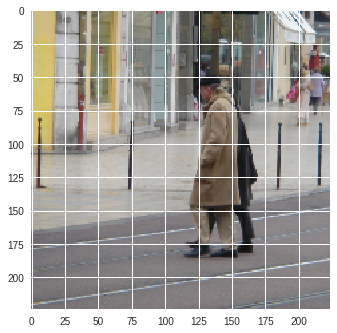

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        11648     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 13, 13, 64)        4704      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 6, 6, 128)         8896      
__________

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import backend as K

img_path = '/content/drive/My Drive/Master/Dataset/INRIA/Test/test/pos/crop001522.png'

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# img_tensor = test_pos[0, :, :, :]
# img_tensor = np.expand_dims(img_tensor, axis=0)
print("image tensor shape: ", img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

# model = load_model('cats_and_dogs_small_1.h5')
model.summary()
# print(model.get_layer("conv2d_1"))

convLayers = 8

# layer = model.get_layer("conv2d_1")
# w = model.get_weights()
# print("-------------------- weights -----------------------------\n", w)
# print("-------------------- weights shape -----------------------------\n", w[0].shape)

# def deprocess_image(x):
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1
#     x += 0.5
#     x = np.clip(x, 0, 1)
#     x *= 255
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# def generate_pattern(layer_name, filter_index, height=150, width=150):
#     layer_output = model.get_layer(layer_name).output
#     loss = K.mean(layer_output[:, :, :, filter_index])
#     grads = K.gradients(loss, model.input)[0]
#     grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
#     iterate = K.function([model.input], [loss, grads])
#     input_img_data = np.random.random((1, height, width, 3)) * 20 + 128.
#     step = 1.
#     for i in range(40):
#         loss_value, grads_value = iterate([input_img_data])
#         input_img_data += grads_value * step
#     img = input_img_data[0]
#     return deprocess_image(img)

# plt.imshow(generate_pattern('conv2d_1', 1))
# plt.show()

layer_outputs = [layer.output for layer in model.layers[:convLayers]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
print("activations size: ", len(activations))

for activation in activations:
    print(activation.shape)

# first_layer_activation = activations[0]
# plt.matshow(activations[0][0, :, :, 4], cmap='viridis')
# plt.show()
# plt.matshow(activations[0][0, :, :, 7], cmap='viridis')
# plt.show()

# plt.interactive(True)

i = 0

for activation_layer in activations:

    figure= plt.figure(i, figsize=(15, 15))
    ncols = 16
    nrows = int(activation_layer.shape[-1]/ncols)

    layer_images = np.copy(activation_layer[0, :, :, 0])
    height = activation_layer.shape[1]
    width = activation_layer.shape[2]
    # layer_images = np.expand_dims(layer_images, axis=0)
    # layer_images = np.asarray(layer_images)
    display_image = np.empty((nrows*height, ncols*width))


    for r in range(nrows):
        for j in range((r*ncols)+1, (r+1)*ncols):

            figure.add_subplot(nrows, ncols, j+1)
            xx = plt.imshow(activation_layer[0, :, :, j], aspect='equal', cmap='gray')#viridis
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            plt.draw()

    i += 1
plt.show()
# plt.interactive(False)

## Class Activation Heatmap (CAM) Visualization

In [0]:
import cv2
import os



img_path = ''
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

humanClass = model.output[:, np.argmax(preds[0])]

last_conv_layer = model.get_layer('')


grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

plt.imshow(superimposed_img)

# cv2.imwrite('', superimposed_img)

